# importing library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
from numpy import nan
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline
from matplotlib.pylab import rcParams

In [4]:
# function to get read the csv file

def create_dataframe(filepath):
    test = pd.read_csv(filepath) # here the given csv file is reading
    return test

filepath = 'E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv'
initial_dataframe = create_dataframe(filepath)

In [251]:
# function for converting timestamp to unixtime and return the ready dataframe

def conversion_timestamp_to_unixtime(initial_dataframe):
    ''' now conversion of timestamp to unixtime will start. In the csv file the column name of
    timestamp is longtime.'''
    
    longTime = initial_dataframe.loc[0:,['longTime']]
    longTime = longTime.as_matrix()
    a = []
    date_time_array = []
    for k in longTime:
        a = np.append(a,k)
    str_time = []
    correct_longtime = []
    datetime_time = []
    count = 0
    
    for b in a:
        b = int(b) # make plain integer
        str_b = str(b)
        c = str_b[-3:]
        new_str_b = str_b.replace(c, '',1)
        new_str_b_time = int(new_str_b)
        correct_longtime.append(new_str_b_time)
        now_time = datetime.datetime.fromtimestamp(new_str_b_time)
        convert_time = now_time.strftime('%Y-%m-%d %H:%M')
        str_time.append(convert_time)
    test_new = initial_dataframe.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added
    test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
    test_new = test_new.drop(['longTime','stringTime','correct_longtime'], axis=1)
    
    return test_new

test_new = conversion_timestamp_to_unixtime(initial_dataframe)

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [ ]:
# # It will print the type of value of each column
# long_time = test_new.correct_longtime
# print(type(long_time))
# string_time = test_new.stringTime
# print(type(string_time))

In [ ]:
# if you want to ceate some datetime column in different format then you need stringtime(maybe).
# then in the previous conversion_timestamp_to_unixtime function just return stringtime

# test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
# test_new['dateTime_column'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [ ]:
# making dateTime column as a index for the test_new panda dataframe
# test_new = test_new.set_index('dateTime')

In [ ]:
test_new.head()

In [283]:
# # multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
# #                            ,'RWWIHOB_MWT0']#rmse error 1.99

# # multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
# #                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

# #RWDAKRWRS8V0
# # 'AEDAHO_T8_V2','AEWIHO_T8AV2',
multivariate_column_label = ['dateTime','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
                             'AEDATZ_TZCP2','AEDATZKA_8P0','AEDATZ_HO_P1','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
# print(size_column)

# print(type(multivariate_column_label))

my_test = test_new.iloc[:][multivariate_column_label]

In [288]:
# for i , j in enumerate(my_test):
#     print(j)

my_test.head()

,dateTime,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
0,2019-04-15 08:52:00,100.0,97.105799,97.701214,75.676574,96.946317,92.762173,96.769885,71.613581,0.000000,0.000000,78.101485
1,2019-04-15 08:51:00,100.0,97.323221,97.899322,75.843611,96.845766,92.499943,96.688945,71.587260,94.125874,91.455009,78.222914
2,2019-04-15 08:50:00,100.0,97.466587,98.069615,76.294951,97.141967,92.471239,96.608792,71.835443,93.824379,91.271537,78.361331
3,2019-04-15 08:49:00,100.0,97.537955,98.150743,76.421113,97.449071,92.470716,96.657246,71.855470,92.927058,90.813233,78.450988
4,2019-04-15 08:48:00,100.0,97.460861,98.099590,77.724204,97.829479,92.643842,96.709574,71.812973,93.125393,90.943040,78.780987


In [289]:
# in this csv file time are order in present to past. Below function will alter it
# here also start and end row has passsed.
# If you want to pass your own desired column name also can pass using multivariate column label.
# take a look at the previous cell

def alter_time(dataframe, start_pos, end_pos):
#     multivariate_data=test_new.iloc[start_pos:end_pos][multivariate_column_label] # comment out this line if you pass column label
    dataframe=dataframe.iloc[start_pos:end_pos][:]
    dataframe=dataframe.loc[::-1]
    
    return dataframe

start_pos = 0
end_pos = 25000
multivariate_data = alter_time(my_test, start_pos, end_pos)
multivariate_data.head()

,dateTime,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
24999,2019-03-11 03:14:00,100.0,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,79.178306
24998,2019-03-11 03:15:00,100.0,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,81.659117
24997,2019-03-11 03:16:00,100.0,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,86.055430
24996,2019-03-11 03:17:00,100.0,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,87.113691
24995,2019-03-11 03:18:00,100.0,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,87.266264


In [290]:
multivariate_data_copy = multivariate_data.copy()
multivariate_data_copy.head()

,dateTime,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
24999,2019-03-11 03:14:00,100.0,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,79.178306
24998,2019-03-11 03:15:00,100.0,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,81.659117
24997,2019-03-11 03:16:00,100.0,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,86.055430
24996,2019-03-11 03:17:00,100.0,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,87.113691
24995,2019-03-11 03:18:00,100.0,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,87.266264


In [154]:
# multivariate_data.columns[4219]

'dateTime'

In [226]:
# function for changing column order. pass dataframe, column name, which order you want to set for the column
def change_column_order(df, col_name, index):
    print(index)
    cols = df.columns.tolist()
    print('printing col length b4 remove',len(cols))
    cols.remove(col_name)
    print('printing col length after remove',len(cols))
    cols.insert(index, col_name)
    return df[cols]

# take the following code in the main file
last_position_of_dataframe = int(multivariate_data_copy.shape[-1]-1)
index_array=[0,-1]
# index_array = np.array(index_array)
req_column_name = ['dateTime','AEWIHO_T9AV2']
for i in range(len(index_array)):
    print(i)
    print(index_array[i],'\t',req_column_name[i])
    column_name = req_column_name[i]
    index_position = index_array[i]
    
    multivariate_data_copy = change_column_order(multivariate_data_copy,column_name,index_position)
    #multivariate_data_copy = multivariate_data_changed_order

0
0 	 dateTime
0
printing col length b4 remove 4220
printing col length after remove 4219
1
-1 	 AEWIHO_T9AV2
-1
printing col length b4 remove 4220
printing col length after remove 4219


In [305]:
def rearrge_frame(dataframe,colname,col_pos):
    
    list_col=dataframe.columns.to_list()
    temp_list=list_col
    for idx,i in enumerate(colname):
        indx=dataframe.columns.get_loc(i)
        temp_list[col_pos[idx]]=i
        temp_list[indx]=list_col[idx]
        
    return dataframe.iloc[:][temp_list]
index_array=[0,-1]
req_column_name = ['dateTime','AEWIHO_T9AV2']
f=rearrge_frame(multivariate_data_copy,req_column_name,index_array)


    

['dateTime', 'DEWIHOBT9_I0', 'AEDATZ_HONP0', 'AEDATZK_ASP0', 'AEDATZ_HO_V0', 'AEDATZ_TZCP2', 'AEDATZKA_8P0', 'AEDATZ_HO_P1', 'AEDAHO_T9_V2', 'RWWIHOB_HWT0', 'RWWIHOB_MWT0', 'AEWIHO_T9AV2']


colname:  ['dateTime', 'AEWIHO_T9AV2']
now index:  0
here:  0


colname:  ['dateTime', 'AEWIHO_T9AV2']
now index:  11
here:  1




In [302]:
reorder_frame.head()

,dateTime,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,DEWIHOBT9_I0
24999,2019-03-11 03:14:00,100.0,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,100.0
24998,2019-03-11 03:15:00,100.0,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,100.0
24997,2019-03-11 03:16:00,100.0,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,100.0
24996,2019-03-11 03:17:00,100.0,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,100.0
24995,2019-03-11 03:18:00,100.0,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,100.0


In [297]:
reorder_frame.columns.get_loc('DEWIHOBT9_I0')

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True])

# below function is working

In [267]:
def keep_100(data_frame,col_name,val):
    df = data_frame[(data_frame[[col_name]] == val).all(axis=1)]
    return df

keep_100_frame = keep_100(reorder_frame,'DEWIHOBT9_I0',100)
print(reorder_frame.shape)
print(keep_100_frame.shape)

(25000, 12)
(24240, 12)


In [280]:
# the function will do the following task
# if the blast furnace signal for turbine 9 is zero then no work will be happened.
# so, remove all the rows where this value will be zero

def drop_zero_value_row_of_blast_furnace_signal(dataframe, blast_furnace_signal):
#     dataframe = dataframe.reset_index()
    count = []
    print(blast_furnace_signal)
    for idx_blast_furnace, val_blast_furnace in enumerate(dataframe[blast_furnace_signal]):
        print(idx_blast_furnace)
        if val_blast_furnace != 100 :
            count = np.append(count,idx_blast_furnace)
    print('size of count array here: ', count.size)
    for t in count:
        print(t)
    if count.size > 0:
        dataframe_1 = dataframe.drop(count,axis=0) # axis= 0 means row indiated. 1 means column indicated
    else:
        dataframe_1 = dataframe
#     dataframe_1 = dataframe_1.drop([blast_furnace_signal], axis=1) # dropping the column. because all value are same   
    return dataframe_1
blast_furnace_signal = 'DEWIHOBT9_I0'

dataframe_no_zero_value_blast_furnace = drop_zero_value_row_of_blast_furnace_signal(reorder_frame,blast_furnace_signal)

DEWIHOBT9_I0
0
1
size of count array here:  2
0.0
1.0


In [282]:
for idx, val in enumerate(reorder_frame):
    print(val)

dateTime
DEWIHOBT9_I0
AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDATZ_TZCP2
AEDATZKA_8P0
AEDATZ_HO_P1
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
DEWIHOBT9_I0


In [11]:
dataframe_no_zero_value_blast_furnace.tail()

,dateTime,row ID,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
4,2019-04-15 08:48:00,Row4,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,...,82.078296,53.172932,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,78.780987
3,2019-04-15 08:49:00,Row3,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,...,82.074011,53.015226,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,78.450988
2,2019-04-15 08:50:00,Row2,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,...,82.098144,53.029243,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,78.361331
1,2019-04-15 08:51:00,Row1,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,...,82.082055,53.182296,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,78.222914
0,2019-04-15 08:52:00,Row0,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,...,92.632593,44.620461,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,78.101485


# this is not working . weird roblem. finding error in index. but if print the array then those index value is in the array

In [12]:
def drop_zero_value_row_of_target_signal(dataframe, target_signal):
    count = []
    for idx_blast_furnace, val_blast_furnace in enumerate(dataframe[target_signal]):
        if val_blast_furnace == 0 :
#             print(type(idx_blast_furnace))
            ids = int(idx_blast_furnace)
#             print(type(ids))
            count = np.append(count,ids)
#     print('!!!',count.size)
#     print(type(count))
    
    for i in count:
        if i > 24222:
            print(i)
    print('size of count array: ', count.size)

    if count.size > 0:
        dataframe_1 = dataframe.drop(count,axis=0) # axis= 0 means row indiated. 1 means column indicated
    else:
        dataframe_1 = dataframe
        
        
    return dataframe_1
target_signal = 'AEWIHO_T9AV2'

dataframe_no_zero_value_target_column = drop_zero_value_row_of_target_signal(dataframe_no_zero_value_blast_furnace,
                                                                                    target_signal)

24223.0
24224.0
24231.0
size of count array:  110


KeyError: '[24223. 24224. 24231.] not found in axis'

# but here the previous function is working. If just dataframe which is passing through the function's index will reset before passing

In [13]:
def drop_zero_value_row_of_target_signal(dataframe, target_signal):
    count = []
    for idx_blast_furnace, val_blast_furnace in enumerate(dataframe[target_signal]):
        if val_blast_furnace == 0 :
            count = np.append(count,idx_blast_furnace)

    for i in count:
        if i > 24222:
            print(i)
    print('size of count array: ', count.size)

    if count.size > 0:
        dataframe_1 = dataframe.drop(count,axis=0) # axis= 0 means row indiated. 1 means column indicated
    else:
        dataframe_1 = dataframe   
    return dataframe_1


target_signal = 'AEWIHO_T9AV2'
dataframe_reset = dataframe_no_zero_value_blast_furnace.reset_index()
dataframe_no_zero_value_target_column = drop_zero_value_row_of_target_signal(dataframe_reset,target_signal)

print('here look the change----')
print('shape of multivariate_data_changed_order: ', multivariate_data_changed_order.shape)
print('shape of dataframe_no_zero_value_blast_furnace: ', dataframe_no_zero_value_blast_furnace.shape)
print('shape of dataframe_no_zero_value_target_column: ', dataframe_no_zero_value_target_column.shape)

24223.0
24224.0
24231.0
size of count array:  110
here look the change----
shape of multivariate_data_changed_order:  (25000, 4220)
shape of dataframe_no_zero_value_blast_furnace:  (24240, 4219)
shape of dataframe_no_zero_value_target_column:  (24130, 4220)


In [14]:
dataframe_new = dataframe_no_zero_value_target_column.drop(['index','row ID'], axis=1)
dataframe_datetime = dataframe_new.set_index('dateTime')

In [15]:
dataframe_datetime.head()

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-03-11 03:14:00,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,60.849423,100.000000,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,79.178306
2019-03-11 03:15:00,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,60.849423,83.088535,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,81.659117
2019-03-11 03:16:00,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,60.384036,95.667996,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,86.055430
2019-03-11 03:17:00,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,60.384036,93.447307,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,87.113691
2019-03-11 03:18:00,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,60.384036,76.483634,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,87.266264


In [16]:
# drop all of the column who has always same value

multivariate_data_drop_column_with_same_value = dataframe_datetime.drop(dataframe_datetime.std()
                                                                        [(dataframe_datetime.std() == 0)].index, axis=1)

In [17]:
print('dataframe_datetime shape: ', dataframe_datetime.shape)
print('multivariate_data_drop_column_with_same_value shape: ', multivariate_data_drop_column_with_same_value.shape)
# multivariate_data_drop_column_with_same_value.head()

dataframe_datetime shape:  (24130, 4217)
multivariate_data_drop_column_with_same_value shape:  (24130, 2901)


In [ ]:
# # dataframe_no_zero_value_blast_furnace.iloc[24231][:]

# signal = [blast_furnace_signal, target_signal]
# value = [100,0]

# def make_frame(dataframe, signal, value):
#     a_array = []
#     b_array = []
    
#     for i,v in enumerate(signal):
#         if v == blast_furnace_signal:
#             new_target=v
#             for idx, valx in enumerate(dataframe[new_target]):
#                 if valx != value[i]:
#                     a_array = np.append(a_array,idx)
#             if a_array.size > 0:
#                 dataframe_1 = dataframe.drop(a_array,axis=0) # axis= 0 means row indiated. 1 means column indicated
#             else:
#                 dataframe_1 = dataframe
#             print('uu')
#             dataframe = dataframe_1
            
            
#         else:
#             new_target_1 = v
#             print(new_target_1)
#             print(value[i])
#             for idx_1,valx_1 in enumerate(dataframe[new_target_1]):
#                 if valx_1 == value[i]:
# #                     print(valx_1)
#                     b_array = np.append(b_array,idx_1)
#             if b_array.size > 0:
#                 dataframe_2 = dataframe.drop(dataframe,axis=0) # axis= 0 means row indiated. 1 means column indicated
#             else:
#                 dataframe_2 = dataframe
    
#     return dataframe_2
    
# r = make_frame(multivariate_data_changed_order,signal,value) 

# new function works flawlessly.

In [ ]:
def keep_100(data_frame,col_name,val):
    df = data_frame[(data_frame[[col_name]] == val).all(axis=1)]
    return df
def remove_zero(data_frame,col_name,val):
    df = data_frame[(data_frame[[col_name]] != val).all(axis=1)]
    return df

d = remove_100(multivariate_data_changed_order,blast_furnace_signal,100)

In [ ]:
e = remove_zero(d,target_signal,0)

In [ ]:
e.shape

In [ ]:
test_1 = remove_val(test,desired_col, desired_val)

In [ ]:
# Think twice before using this function
# checking if any column has zero value or not. If YES then replace zero with NAN and drop the row

# a = dataframe_no_zero_value_blast_furnace[blast_furnace_signal].isnull().sum()
# print(a)

def drop_nan_value(dataframe):
    for index,column in enumerate(dataframe):
        nan_catcher = dataframe[column].isnull().sum()
        if nan_catcher !=0:
            multivariate_data_drop_zero = dataframe[column].replace(0,nan)
            multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)
#             print(column,' has total',nan_catcher, 'nan valu')
        else:
            multivariate_data_drop_zero = dataframe
#             print(column,' is free from nan value. look it has: ', nan_catcher,' value')
            
    return multivariate_data_drop_zero

multivariate_data_drop_zero = drop_nan_value(dataframe_no_zero_value_blast_furnace)

In [ ]:
# # as this dataframe has created by taking value for each minute. 
# # so it should be checked is there every minute is present or not.
# # for doing this a function to do resampling for '1 min' and then fill the new row if has created with interpolation
# # will be added. But if the new dataframe contains more than 20 percent rows of the previous dataframe the new one will
# # not be used

# def resample_and_interpolation(dataframe,resampling_term,interpolation_way):
    
#     dataframe = dataframe.set_index('dateTime')
#     multivariate_data_drop_zero_resample = dataframe.resample(resampling_term).mean()
#     multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate(interpolation_way)
    
#     return multivariate_data_drop_zero_interpolate


# resampling_term = '1min'
# interpolation_way = 'linear'
# multivariate_data_drop_zero_interpolate = resample_and_interpolation(multivariate_data_drop_zero,resampling_term,interpolation_way)
# # multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()
# # multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

In [ ]:
# print(multivariate_data_drop_zero.loc[[24227]])

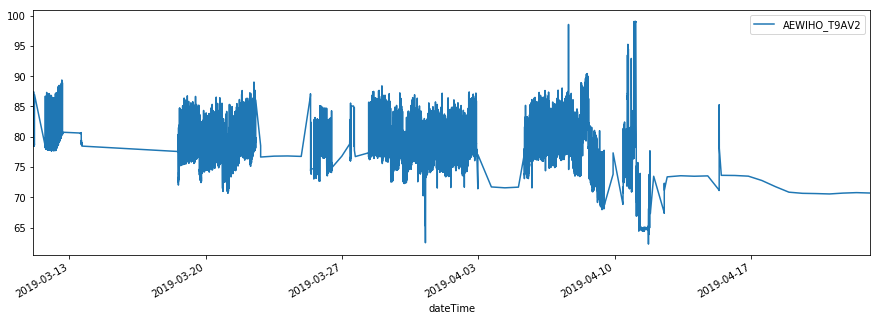

In [19]:
multivariate_data_drop_column_with_same_value.iloc[0:].plot(y = multivariate_data_drop_column_with_same_value.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)

In [ ]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_column_with_same_value.shape)

In [ ]:
path = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code'
multivariate_data_drop_column_with_same_value.to_csv(path+'/'+'file_no_column_with_unique_value.csv')

# function which will return dataframe which has only best feature column using SelectKBest

In [20]:
def feature_selection_with_selectKbest(dataframe,max_best_number):
    train_input = dataframe.iloc[:,:-1]
    train_output = dataframe.iloc[:,-1]
    train_output = train_output.to_frame()
    
    X, y = train_input, train_output
    X = X.astype(int)
    y = y.astype(int)
    
    bestfeatures = SelectKBest(score_func=chi2, k=2)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#     print(featureScores.nlargest(20,'Score'))  #print 10 best features
    d = featureScores.nlargest(max_best_number,'Score')
    
    e = []
    for i,v in enumerate(d['Specs']):
        e = np.append(e,v)
    
    e = np.append(e,dataframe.columns[-1])
    final_dataframe = dataframe.iloc[:][e]
    
    return final_dataframe

sklearn_feature_best_dataframe = feature_selection_with_selectKbest(multivariate_data_drop_column_with_same_value,20)
sklearn_feature_best_dataframe.head()
    

,DEHGHOB_OSI0,DEHGK6_R_HI0,AEHGHOBBRKG0,DEHGK6_K_AG0,DEO2GBHRV2I1,DEO2GBHSS2I3,DEHGF_CHYPI2,DEHGF_C_ZGI2,DEO2RHO_MDP0,DEO2GBHSS1G2,...,DEKOSW_USCI0,AEWIHOBKF_V0,RWZEKOKBSGI0,DEKDHO_T7_A0,AEKGKOKB__V0,AEO2MEMA7AV0,DEKOSGG___P3,AEO2ME_A7AV0,AEOETZKK3_V0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-03-11 03:14:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.178306
2019-03-11 03:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.659117
2019-03-11 03:16:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,63.681313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.055430
2019-03-11 03:17:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,63.681313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.113691
2019-03-11 03:18:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,76.279499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.266264


In [ ]:
# graph_array =[]
# for j,k in d.iterrows():
#     graph_array = np.append(graph_array,j)

# for i in range(len(graph_array)):
#     dataframe_to_train_time_index.iloc[0:].plot(y = dataframe_to_train_time_index.columns[i], use_index=True)
#     plt.rcParams['figure.figsize'] =(5,5)

# Correlation matrix

In [21]:
# find correlated matrix for dataframe which came from sklearn feature selection and the datafarem which has passed
# to sklearn feature selection function

def pearson_correlation(sklearn_dataframe, main_dataframe):
    sklearn_correlation = sklearn_dataframe.corr()
    main_correlation = main_dataframe.corr()
    return sklearn_correlation, main_correlation

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, 
                                                            multivariate_data_drop_column_with_same_value)
print(sklearn_correlation.shape)
print(main_correlation.shape)

(21, 21)
(2901, 2901)


In [88]:
# # correlated_dataframe.to_csv(path+'/'+'correlation_dataframe_where_no_column_with_same_value.csv')
# sklearn_correlation.to_csv('sklearn_correlation_matrix.csv')
# main_correlation.to_csv('main_correlation_matrix.csv')

In [ ]:
# multivariate_data_drop = multivariate_data_2.drop([multivariate_data_2.columns[1],multivariate_data_2.columns[2],
#                                                   multivariate_data_2.columns[-3],multivariate_data_2.columns[-2]], axis=1)

In [ ]:
# multivariate_data_drop.columns.get_loc("AEWIHO_T9AV2")

In [ ]:
# multivariate_data_drop.columns[-1]

In [ ]:
# multivariate_data_drop.tail()

In [ ]:
# multivariate_data_drop.loc[4]['AEAGHOAWE2T1']

In [ ]:
# multivariate_data_drop_dummy = multivariate_data_drop.set_index('dateTime')

In [ ]:
# multivariate_data_drop_dummy.head()

In [ ]:
# s.describe()

In [ ]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])

In [ ]:
# checking column type
# s = multivariate_data['dateTime_column'].dtype
# print(s)

In [ ]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])
# tr = multivariate_data.drop(multivariate_data.columns[-1], axis=1)

In [ ]:
# tr = multivariate_data_copy.copy()
# tr['Date'] = multivariate_data['dateTime'].dt.strftime('%d/%m/%Y')
# tr['Time'] = multivariate_data['dateTime'].dt.strftime('%H:%M:%S')

# date_type = tr['Date'].dtype
# time_type = tr['Time'].dtype
# print('date_type: ', date_type)
# print('time_type: ',time_type)

In [ ]:
# # converting previously created date and time column to datetime type
# tr['Date'] = pd.to_datetime(tr['Date'])
# tr['Time'] = pd.to_datetime(tr['Time'])

# date_type = tr['Date'].dtype
# time_type = tr['Time'].dtype

# print("to observe the difference look in the previous cell's output")
# print('date_type: ', date_type)
# print('time_type: ',time_type)

In [ ]:
# e1 = tr['Date'].dtype
# print(type(e1))

In [ ]:
# it will return a column with weekday name
# tr['Weekday_name'] = tr.index.weekday_name

In [ ]:
# It will return a column with number associated with DAY. like monday =0, Tuesday=1 and so on
# tr['weekday'] = multivariate_data['dateTime_column'].apply(lambda x: x.weekday())

In [ ]:
# tr['TypeofDAY'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 'Weekday', 'weekend') # if the associated number less than 5 then weekend, otherwise weekday
# tr['TypeofDAY_number'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 1, 0) # 1 for weekday, 0 for weekend

In [ ]:
# make all the time(without date) to numeric value
# tr['numric_time'] = pd.to_timedelta(tr['Time']).dt.total_seconds()

In [ ]:
# tr.head()

In [ ]:
# tr.columns

In [ ]:
# # this code will count how many date is came from 11th march
# my_array=[]
# count = 0

# for index_2, value_2 in tr.iterrows():
#     for i_2 , v_2 in enumerate(value_2):
#         if i_2 == 12 and v_2 != 0.0:
# #             print(v_2)
#             v_2_split = v_2.split('/')
#             if v_2_split[0] == '11' and v_2_split[1]=='03' :
#                 my_array = np.append(my_array,index_2)
# #                 print(v_2)
# #                 print(count)
            
#                 count+=1
# # print('-------',count)
# print(len(my_array))

In [ ]:
# modification of the previus code
# tr_33 = tr.reset_index()
# df2 = pd.DataFrame()
# for idx , v_2 in enumerate(tr_33['Date']):
# #     print(idx)
#     if v_2 != 0.0:
#         v_2_split = v_2.split('/')
#         if v_2_split[0] == '11' and v_2_split[1]=='03':
#             required_dataframe = pd.DataFrame(tr_33.iloc[idx:(idx+1),:], columns=tr_33.columns)
#             df2 = pd.concat([df2, required_dataframe], axis=0)

In [ ]:
# vvv = tr.groupby('TypeofDAY')
# vvv.head(1)

# tr['AEWIHO_T9AV2'].describe()

In [ ]:
# very efficient to group all the value with respect to column and store them in a dictionary
# necessary for plotting graph

# dict_of_day_type = {k:v for k,v in tr.groupby('TypeofDAY')}
# # plt.ioff()
# key_value = collections.OrderedDict(dict_of_day_type)

# for k_1 in key_value:
#     print(k_1)
#     my_week = dict_of_day_type[k_1]
#     my_week.iloc[:].plot(y=['AEWIHO_T9AV2'])
#     describe = my_week['AEWIHO_T9AV2'].describe()
#     RMSE = 2
#     textstr = 'describe=%.2f\nRMSE=%.2f\n'%(1, 2)
#     plt.text(0.5, 0.5, textstr, fontsize=14)
#     plt.savefig(path_1+str(k_1)+'_'+'.jpg')
# #     plt.close()

In [ ]:
# dict_of_dates = {k: v for k, v in tr.groupby('Date')}

# import collections
# prices  = collections.OrderedDict(dict_of_dates)

# path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

# for k in prices:
#     k_sp = k.replace('/','_')
#     my_f = dict_of_dates[k]
#     my_f.iloc[:].plot(y=['AEWIHO_T9AV2'])
#     plt.savefig(path_1+str(k_sp)+'_'+'date.jpg')
#     plt.ioff()
# #     print(my_f.iloc[:]['AEWIHO_T9AV2'])
    
    

In [ ]:
# e = 'weekend'
# print(type(e))
# for index_1, value_1 in tr.iterrows():
#     for i_1 , v_1 in enumerate(value_1):
#         if i_1 == 13 and v_1 == e:
#             d = tr.index.get_loc(index_1) #It will give the row value for the corresponding index of the dataframe
# #             print(tr.iloc[d]['Weekday_name'])
#             print(index_1)

In [ ]:
# dict_of_dates = {k: v for k, v in tr.groupby('Date')}

# import collections
# prices  = collections.OrderedDict(dict_of_dates)

# # path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

# for k in prices:
#     k_sp = k.replace('/','_')
#     print(k,'\t',k_sp)

# # import pprint
# # pprint.pprint(dict_of_dates)

In [ ]:
# # tr_group = tr.groupby(pd.Grouper(freq='1Y')).sum()
# # tr_group.head()

# tr_1 = tr['2019-03-11':'2019-03-11']
# tr_1.tail()
# print(len(tr_1))

In [ ]:
# morning_shift = tr_1.between_time('06:00', '14:00')
# day_shift = tr.between_time('14:01', '22:00')
# night_shift = tr.between_time('22:01', '05:59')

In [ ]:
# present_data.plot(y=present_data.columns['AEWIHO_T9AV2'])

In [ ]:
# pr_1 = present_data.drop(multivariate_column_label[0], axis=1)

In [ ]:
# zero_index=[]
# zero_index=np.array(zero_index)
# for index, value in pr_1.iterrows():
#     for i , v in enumerate(value):
#         if i == 0  and v == 0.0:
# #             print('index: ',index)
#             zero_index=np.append(zero_index,index)

# print('size of zero_index: ',zero_index.size)

In [ ]:
# if zero_index.size > 0:
#     pr_1_modify = pr_1.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
# else:
#     pr_1_modify = pr_1

In [ ]:
# cols = [-1,-2,-3,-4,-5,-6,-7]
# pr_1_modify_drop = pr_1_modify.drop(pr_1_modify.columns[cols], axis=1)

In [ ]:
# multivariate_data_modify = pr_1_modify_drop

# from numpy import nan
# multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
# multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [ ]:
# print(multivariate_data_modify.shape)
# print(multivariate_data_drop_zero.shape)

In [242]:
dataframe_high_correlation.head()

,RWDAHOBG9_V0,AEDAHO_T9_V2,RWDATZ_HO_V1,RWWIHOBG9_V0,RWWIHOBK__T0,AEWIGHG9_AG1,AEWIGHG9_AG2,AEWIGHG9_AG3,AEWIGHG9__T0,AEWIHOBM__P0,AEWIHOBKF_V0,AEWIHOBK__T0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,
2019-03-11 03:14:00,83.841293,83.327361,50.619761,79.666313,90.308474,97.229202,97.224403,96.777397,92.719615,88.893151,0.000000,90.434380,79.178306
2019-03-11 03:15:00,84.832219,84.314814,51.100140,82.313647,90.430027,97.566803,97.566803,97.113998,92.530794,88.893151,0.000000,90.434380,81.659117
2019-03-11 03:16:00,84.835578,84.380943,51.167150,86.667405,90.293459,97.566803,97.571602,97.108704,92.426648,86.467066,63.681313,89.978692,86.055430
2019-03-11 03:17:00,83.749498,83.279853,50.420753,87.678913,89.981116,97.566803,97.582703,97.112000,92.579243,86.467066,63.681313,89.978692,87.113691
2019-03-11 03:18:00,80.270870,79.963124,48.254525,87.828344,90.053752,97.563904,97.555199,97.114899,92.628148,86.467066,76.279499,90.044065,87.266264


In [246]:
for i in dataframe_high_correlation:
    drop_consecutive_same_value_zero = dataframe_high_correlation.loc[dataframe_high_correlation[i].shift() != dataframe_high_correlation[i]]

In [247]:
print(dataframe_high_correlation.shape)
print(drop_consecutive_same_value_zero.shape)

(24130, 13)
(24108, 13)


In [ ]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

print('shape of multivariate_data_drop_zero_resample: ', multivariate_data_drop_zero_resample.shape)
print('shape of multivariate_data_drop_zero_interpolate: ',multivariate_data_drop_zero_interpolate.shape)

In [248]:
# # print(len(multivariate_column_label))
# for idx, i in enumerate(multivariate_column_label):
#     now_idx = idx+2
    
#     if now_idx == len(multivariate_column_label):
#         print('terminate')
#         break
#     print(multivariate_column_label[now_idx])
#     drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
#     drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


In [ ]:
print('shape of drop_consecutive_same_value_zero: ', drop_consecutive_same_value_zero.shape)
print('shape of drop_consecutive_same_value_interpolate: ', drop_consecutive_same_value_interpolate.shape)

In [ ]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [ ]:
new_dataframe.head()

In [ ]:
# start = 0
# end = 300

# loop = int(len(new_dataframe)/300)+1
# path = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/fig_target_night/'

# for i in range(loop):
#     if end < len(new_dataframe):
        
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
        
#         plt.savefig(path+str(start)+'_night.jpg')
#         start = end
#         end = end+300
#     else:
#         start = start
#         end = len(new_dataframe)
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
#         plt.savefig(path+'final_'+str(len(new_dataframe))+'_night.jpg')
        
# #     plt.rcParams['figure.figsize'] =(20,10)

In [ ]:
new_dataframe.iloc[0:].plot(y = new_dataframe.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(20,20)

In [ ]:
dateRange = pd.date_range(new_dataframe.index[0],new_dataframe.index[10], freq='1min')
print(dateRange)
plt.plot(dateRange,new_dataframe.iloc[0:11,-1])
plt.xlim(dateRange[0],dateRange[-1])
plt.xticks(rotation=25)

In [ ]:
dateRange[-1]

In [ ]:
# start_1 = 700
# end_1 = start_1+300
# new_dataframe.iloc[start_1:end_1].plot(x = new_dataframe.index.format(), y=new_dataframe.columns[-1])
plt.plot(new_dataframe.iloc[0:100].index.format(), new_dataframe.iloc[0:100,-1])
plt.show()

In [ ]:
print(max(new_dataframe.iloc[start_1:end_1][new_dataframe.columns[-1]]))

print(len(new_dataframe))

In [ ]:
test_new.iloc[0:2000].plot(y=new_dataframe.columns[-1])

In [ ]:
new_dataframe.plot(y=new_dataframe.columns[-1])

In [22]:
# function to make dataframe with high correlated valued column
def make_dataframe_with_high_correlated_value(main_dataframe,correlated_dataframe,target_column,
                                              correlation_threshold_value,max_value):
    
    dataframe = correlated_dataframe.reset_index()
    
    high_correlated_array_with_target = []
    for index_corr_reset, val_corr_reset in enumerate(dataframe[target_column]):
        if val_corr_reset > correlation_threshold_value and val_corr_reset < max_value:
            required_column = dataframe.loc[index_corr_reset]['index']
            if required_column != target_column:
                high_correlated_array_with_target = np.append(high_correlated_array_with_target,required_column)
            else:
                print(required_column)
                pass
            
    final_array = np.append(high_correlated_array_with_target,target_column)
    new_dataframe = main_dataframe.iloc[:][final_array]
    
    return new_dataframe

correlation_threshold_value = 0.5
max_value = 0.9
target_column = multivariate_data_drop_column_with_same_value.columns[-1] # here declaring who is target column.


main_frame = multivariate_data_drop_column_with_same_value
correlated_frame = main_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             target_column,correlation_threshold_value,max_value)

print('dataframe_high_correlation shape: ', dataframe_high_correlation.shape)

dataframe_high_correlation shape:  (24130, 13)


In [97]:
# e = pd.read_csv('dataframe_correlated_from_main_frame.csv')

In [99]:
# e.shape

(24130, 14)

In [249]:
def make_dataset(dataframe):
    dataset = np.array(dataframe)
    NumberOfElements=int(len(dataset)*0.98)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(drop_consecutive_same_value_zero)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  23625
dataset length:  24108
train_input shape:  (23625, 12)
train_output shape:  (23625,)
test_input shape:  (483, 12)
test_output shape:  (483,)


In [80]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [250]:
model_list = [LinearRegression(), ExtraTreesRegressor()]
name = ['linearregression','extraregressor']

for idx,i in enumerate(model_list):
    train_model_1 = i
    print('-------',name[idx])
    train_model_1.fit(train_input,train_output)
    predicted_output=train_model_1.predict(test_input)
    print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
    print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
    print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
    RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
    print('RMSE: ',RMSE)
    print('\n')

------- linearregression
r_2 statistic: -2.46
Mean_absolute_error: 3.11
Mean squared error: 43.42
RMSE:  6.589211891041889


------- extraregressor


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


r_2 statistic: 0.91
Mean_absolute_error: 0.59
Mean squared error: 1.18
RMSE:  1.0884241477890257




In [232]:
# train_model = LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
train_model = ExtraTreesRegressor(n_estimators=100, random_state=0)
# train_model =  AdaBoostRegressor()
# train_model = MLPRegressor()
# train_model = GBR()
train_model.fit(train_input, train_output)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)

In [233]:
print(train_model)
predicted_output=train_model.predict(test_input)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)


In [234]:
# print('Slope:' ,train_model.coef_)
# print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: 0.91
Mean_absolute_error: 0.55
Mean squared error: 1.19
RMSE:  1.0890718971491118


In [32]:
model = 'GBR'

min : 62.263747326034974  and max:  85.29885491380395
min : 64.52906285390715  and max:  85.21548383037627


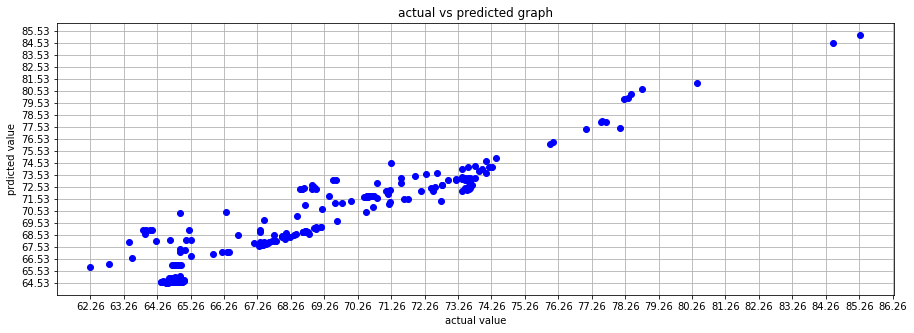

In [235]:
low = 0
high = len(predicted_output)

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))

plt.plot(test_output[low:high], predicted_output[low:high], 'bo')
# plt.plot(predicted_output[low:high],test_output[low:high], 'bo')

plt.xticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

plt.xlim(min(test_output[low:high]-1), max(test_output[low:high])+1)
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')

plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted graph')
# plt.savefig(model+'_'+'figure_actual_vs_predicted.jpg')

plt.show()

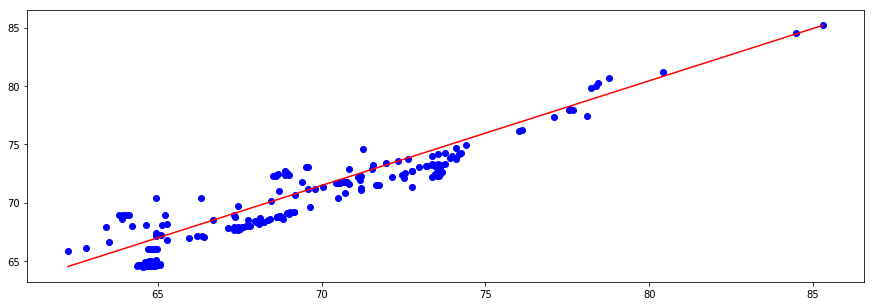

In [236]:
plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)), color='red')
plt.scatter(test_output,predicted_output, color = 'blue')
# plt.savefig(model+'_'+'figure_actual_vs_predicted_with_best_fit_line.jpg')
plt.show()

<class 'numpy.ndarray'>


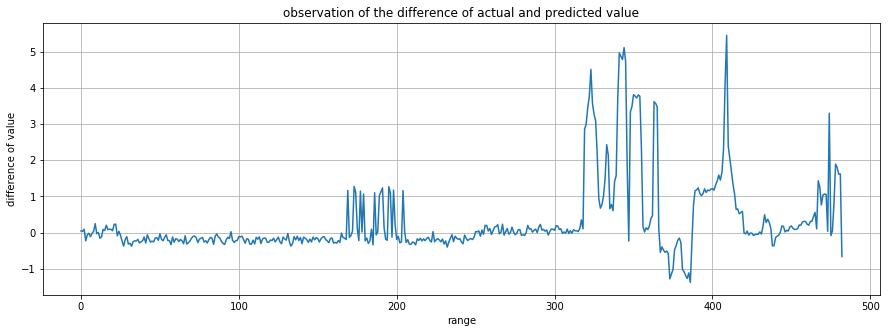

In [237]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[:])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig(model+'_'+'difference_of_actual_and_predicted_value.png')
plt.show()

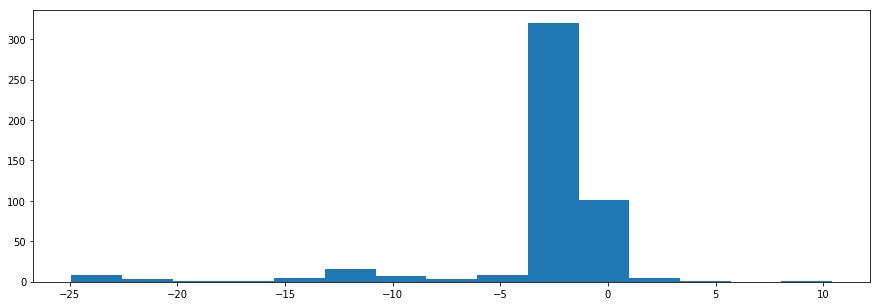

In [87]:
plt.hist(difference_of_value, bins=15)
# plt.xlim(-10,10,1)
# plt.savefig(model+'_'+'histogram_of_difference_value.jpg')
plt.show()

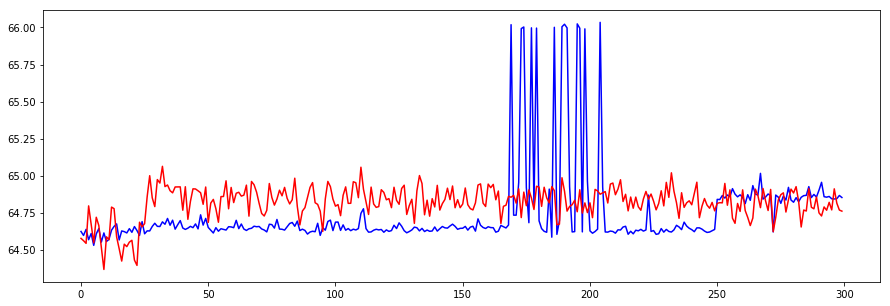

In [239]:
plt.plot(predicted_output[0:len(predicted_output[0:300])], color = 'blue')
plt.plot(test_output[0:300], color = 'red')
# plt.xlim(0,40,1)
# plt.ylim(50,70,1)
# plt.savefig(model+'_'+'figure_difference_between_actual_and_predicted_value.jpg')
plt.show()

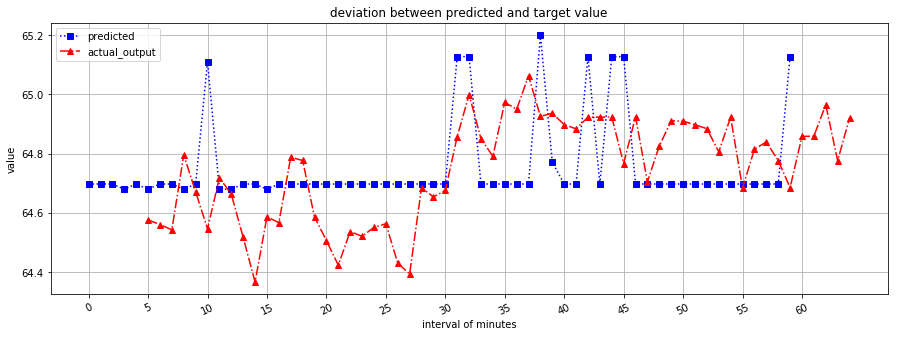

In [119]:
actual_data = range(65)

plt.plot(predicted_output[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
# plt.rcParams['figure.figsize'] =(20,10)
plt.savefig(model+'_'+'figure_actual_vs_predicted.jpg')
plt.show()

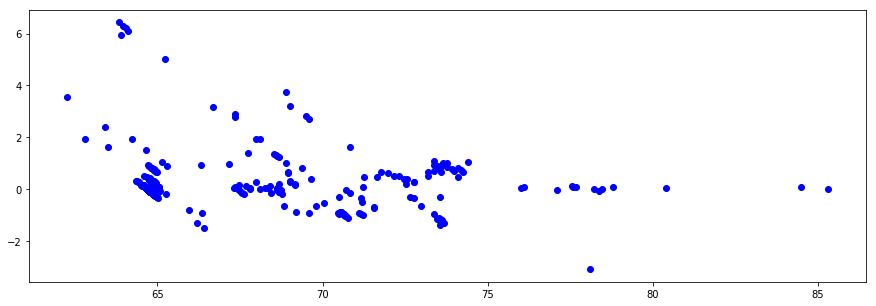

In [120]:
# graph actual vs error

low_1 = 0
high_1 = len(test_output)

plt.plot(test_output[low:high], difference_of_value[low:high], 'bo')
plt.savefig(model+'_'+'figure_actual_vs_error.jpg')
plt.show()

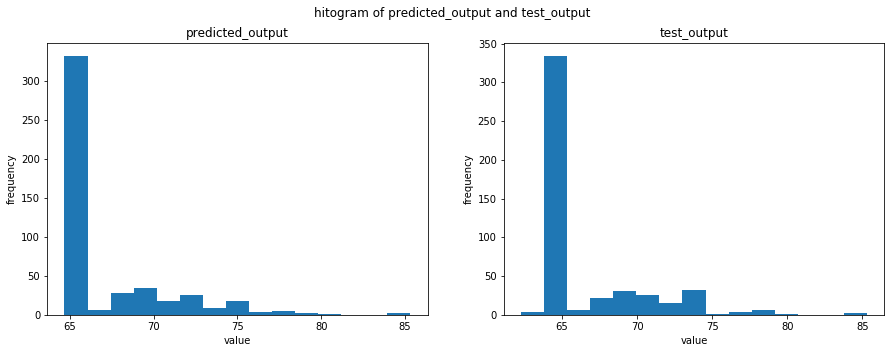

In [121]:
plt.subplot(1,2,1)
plt.hist(predicted_output, bins=15)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('predicted_output')
# plt.xlim(-10,10,1)
plt.subplot(1,2,2)
plt.hist(test_output, bins=15)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('test_output')

plt.suptitle('hitogram of predicted_output and test_output')
plt.savefig(model+'_'+'figure_hitogram of predicted_output and test_output.jpg')
plt.show()

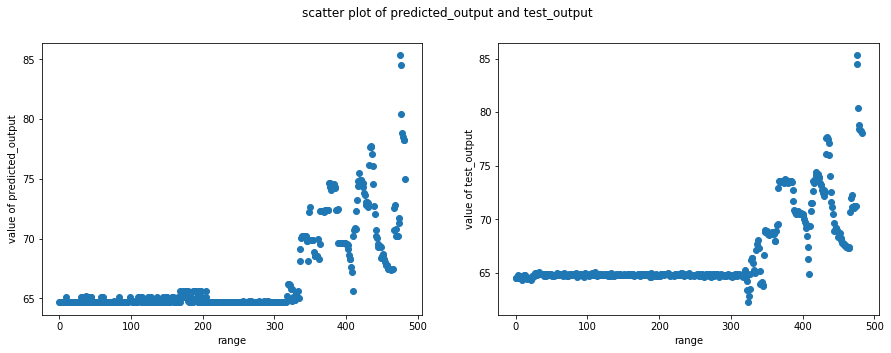

In [122]:
plt.subplot(1,2,1)
plt.scatter(range(0, len(predicted_output)),predicted_output)
plt.xlabel('range')
plt.ylabel('value of predicted_output')
plt.subplot(1,2,2)
plt.scatter(range(0, len(test_output)),test_output)
plt.xlabel('range')
plt.ylabel('value of test_output')
plt.suptitle('scatter plot of predicted_output and test_output')
plt.subplots_adjust(hspace=0.5)
plt.savefig(model+'_'+'figure_scatter_plot_predicted_and_actual_value.jpg')
plt.show()

min : 62.263747326034974  and max:  85.29885491380395


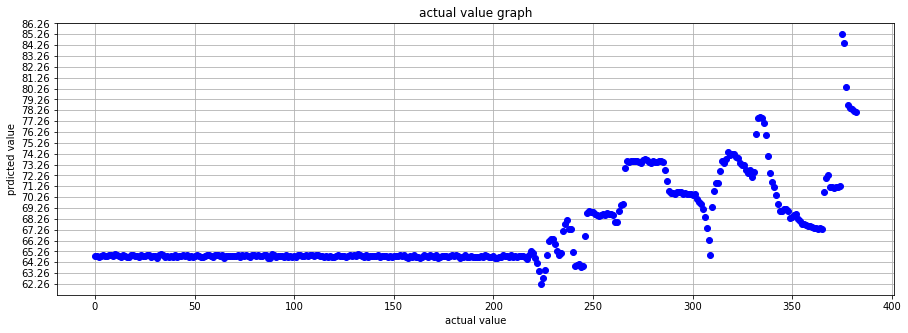

In [74]:
low = 100
high = 500

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(test_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(test_output[low:high]-1), max(test_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('actual value graph')

plt.show()

min : 64.52906285390715  and max:  85.21548383037627


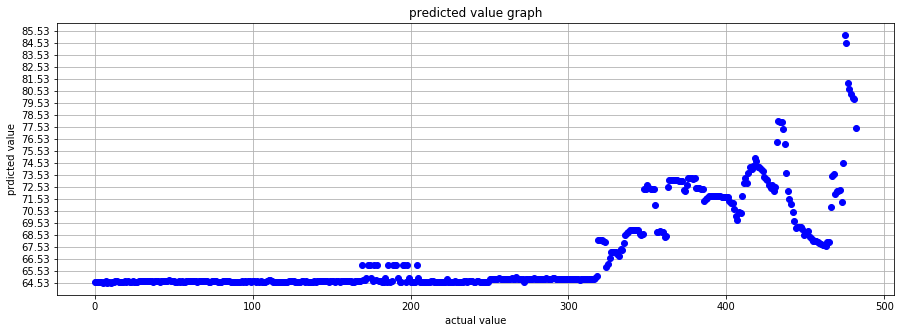

In [75]:
low = 0
high = 500

print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(predicted_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('predicted value graph')

plt.show()

# CONV LSTM

In [120]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.98)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    multiple_ip_train_data = dataset[0:NumberOfElements]
    multiple_ip_test_set = dataset[NumberOfElements:len(dataset)]
    
    return multiple_ip_train_data, multiple_ip_test_set

multiple_ip_train_data, multiple_ip_test_set = make_dataset(dataframe_high_correlation)

print('train_data_conv shape: ', multiple_ip_train_data.shape)
print('test_data_conv shape: ', multiple_ip_test_set.shape)

dataset length:  24130
Number of Elements for training:  23647
train_data_conv shape:  (23647, 13)
test_data_conv shape:  (483, 13)


In [121]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import callbacks

In [122]:
 # split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_1 = 2
# split into samples
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, n_steps_1)

print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

X_Conv_Lstm shape:  (23645, 2, 12) 	X_Conv_Lstm size:  567480 	X_Conv_Lstm dimension:  3
y_Conv_Lstm shape:  (23645,)  size:  23645  dim:  1


In [123]:
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]

samples = X_Conv_Lstm.shape[0]
time = n_steps_1
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [124]:
# define model

# cbks = [callbacks.LearningRateScheduler(lambda x: 1. / (1. + x))]

lr = 0.01

def lr_schedule(epoch):
#     print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
#     print('now lr_1: ', lr_1)
    return lr_1

batch_size=32
epochs= 30
activation_function = 'relu'

In [125]:
model = Sequential()
# n_seq, 1, n_steps_2, n_features
model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function), input_shape=(time,rows,cols,channels),return_sequences=False))
# model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [126]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1,
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

Epoch 1/30
23645/23645 [==============================] - 8s 344us/step - loss: 24.3850 - acc: 0.0000e+00
Epoch 2/30
23645/23645 [==============================] - 7s 275us/step - loss: 3.5924 - acc: 0.0000e+00
Epoch 3/30
23645/23645 [==============================] - 7s 277us/step - loss: 86484.7754 - acc: 0.0000e+00
Epoch 4/30
23645/23645 [==============================] - 6s 265us/step - loss: 1619006.0116 - acc: 0.0000e+00
Epoch 5/30
23645/23645 [==============================] - 7s 280us/step - loss: 101613573.4863 - acc: 0.0000e+00
Epoch 6/30
23645/23645 [==============================] - 6s 257us/step - loss: 1139029071.6405 - acc: 0.0000e+00
Epoch 7/30
23645/23645 [==============================] - 7s 291us/step - loss: 1881499388.2982 - acc: 0.0000e+00
Epoch 8/30
23645/23645 [==============================] - 7s 277us/step - loss: 7435589358.3333 - acc: 0.0000e+00
Epoch 9/30
23645/23645 [==============================] - 7s 280us/step - loss: 6916918846.6610 - acc: 0.0000e+00


In [127]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

X_Conv_Lstm_test shape:  (481, 2, 12) 	 X_Conv_Lstm_test dimension:  3


In [128]:
yhat = model.predict(x_input, verbose=1)
# print(yhat)

481/481 [==============================] - 0s 381us/step


In [130]:
print('r_2 statistic: %.2f' % r2_score(y_Conv_Lstm_test,yhat))
Error = mean_squared_error(y_Conv_Lstm_test,yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

r_2 statistic: -9484807.86
mean squared error:  119223856.8382355
RMSE Error:  10918.967755160535


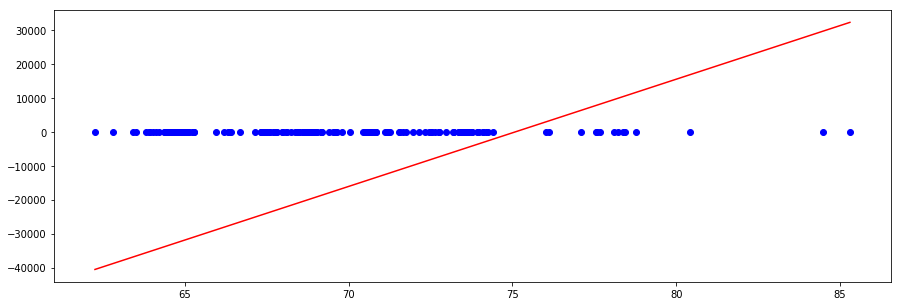

In [131]:

plt.plot((min(y_Conv_Lstm_test),max(y_Conv_Lstm_test)), (min(yhat),max(yhat)), color='red')
plt.scatter(test_output,predicted_output, color = 'blue')
# plt.savefig(model+'_'+'figure_actual_vs_predicted_with_best_fit_line.jpg')
plt.show()